# Final Project Submission

Please fill out:
* Student name: Jamaal Darius Smith
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:
* Video of 5-min Non-Technical Presentation:


# TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=4rem>
    
- [Introduction](#INTRODUCTION)<br>
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- [Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>
</font>
___


# INTRODUCTION

The goal of this project is to create a multivariable linear regression that predicts the value of a house based on predictor variables.The insights from this model can prove valuable because it can be used for many purposes. From real estate agents being able to provide estimates to potential clients to academic researchers checking to see if homes in different neighborhoods are sold for prices that reflect their value based on intrinsic features instead of market dynamics, being able to estimate the price of homes in the Seattle area will be very fruitful in the real-world.



# OBTAIN

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn import preprocessing

data = pd.read_csv('kc_house_data.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# SCRUB

The first step that must be taken to prepare the data for the model is to address any missing values like null values.Based on the table above produced by the info object, waterfront and yr_renovated have the most null values present and need to be addressed.

In [23]:
data ['waterfront'] = data['waterfront'].fillna(0.0)
data ['yr_renovated'] = data['yr_renovated'].fillna(0.0)
data['view'] = data['view'].fillna(0.0)

Since most values are 0, meaning they are not by the waterfront, we can replace null values with 0 in this dataframe/column.

In [24]:
data['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [26]:
data = data.dropna()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


Next we must address the object datatype in the date and sqft_basement columns. During this step, we can also eliminate missing values represented by ? in sqft_basement column.

In [28]:
data.drop(data.loc[data['sqft_basement']=='?'].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null float64
view             21143 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null object
yr_built         21143 non-null int64
yr_renovated     21143 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [29]:
data['date'] = pd.to_datetime(data['date'])
data['year_sold'], data['month_sold'] = data['date'].dt.year, data['date'].dt.month
data['year_sold'].astype(int)
data['sqft_basement'].astype(float)

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
7           0.0
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
30          0.0
31          0.0
          ...  
21566     280.0
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

# Explore and Transformation

The possibility of categorical variables being in the dataset is the next step needed to prepare the data for analysis. The plots below are one way of diagnosing the presence of this phenomenon. Looking at the unique values for each column suspected of being categorical will also be useful.

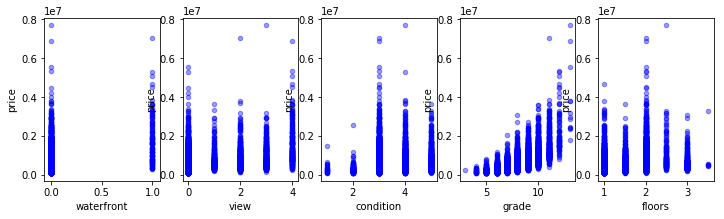

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,3))

for xcol, ax in zip(['waterfront','view', 'condition','grade','floors'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [31]:
items = ['waterfront','view', 'condition','grade','floors']

for item in items:
    print(f"{item} unique values",data[item].nunique())

waterfront unique values 2
view unique values 5
condition unique values 5
grade unique values 11
floors unique values 6


While the graphs above look like vertical lines, the presence of unique values showcases that the these varaibles just have large areas of concentration and are not categorical for the purposes of this model. The graphs below are designed to see whether or not there is a linear relationship between predictor variables and the dependent variable, price.

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


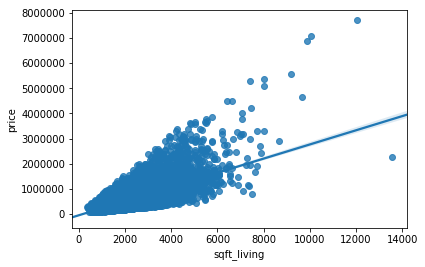

In [32]:
sns.regplot(x="sqft_living",y="price",data=data)

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


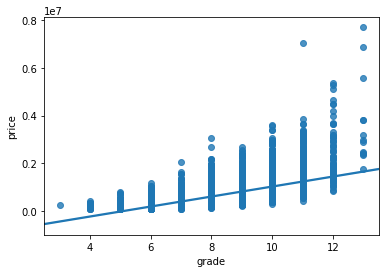

In [33]:
sns.regplot(x="grade",y="price",data=data)

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


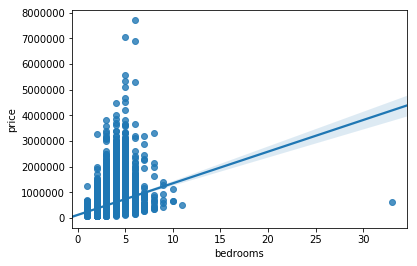

In [34]:
sns.regplot(x="bedrooms",y="price",data=data)

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


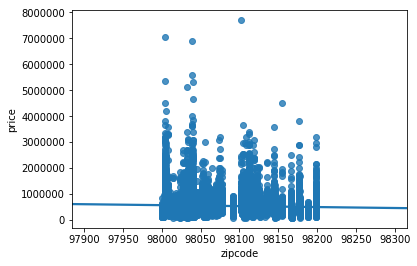

In [35]:
sns.regplot(x="zipcode",y="price",data=data)

While the variables such as waterfront were not deemed to be categorical, zipcode appears to be categorical. To test out this assumption, we will measure the regression model with zipcode as it was in the dataset and as a dummy variable.

In [36]:
zip_dummies = pd.get_dummies(data['zipcode'], prefix='zip', drop_first=True)
grade_dummies = pd.get_dummies(data['grade'], prefix='grade', drop_first=True)

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


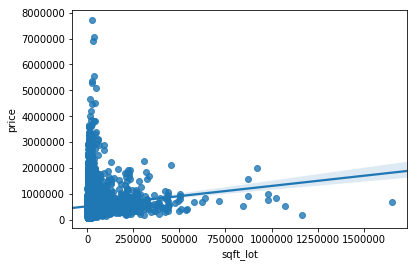

In [37]:
sns.regplot(x="sqft_lot",y="price",data=data)

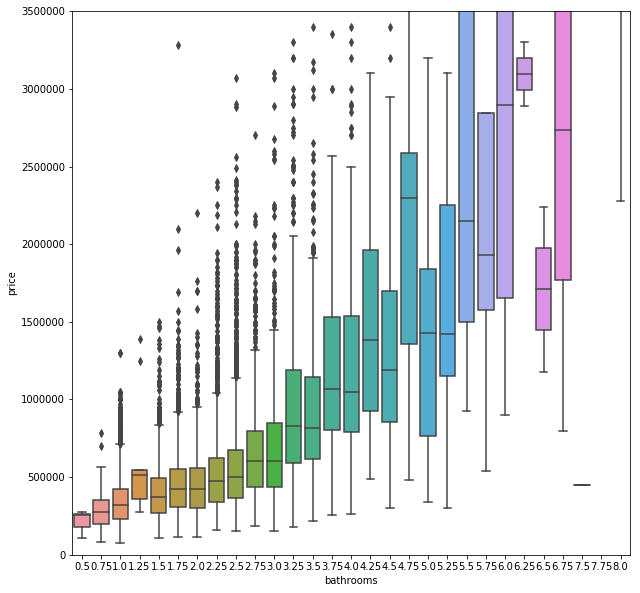

In [38]:
var = 'bathrooms'
data_graph = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data_graph)
fig.axis(ymin=0, ymax=3500000);



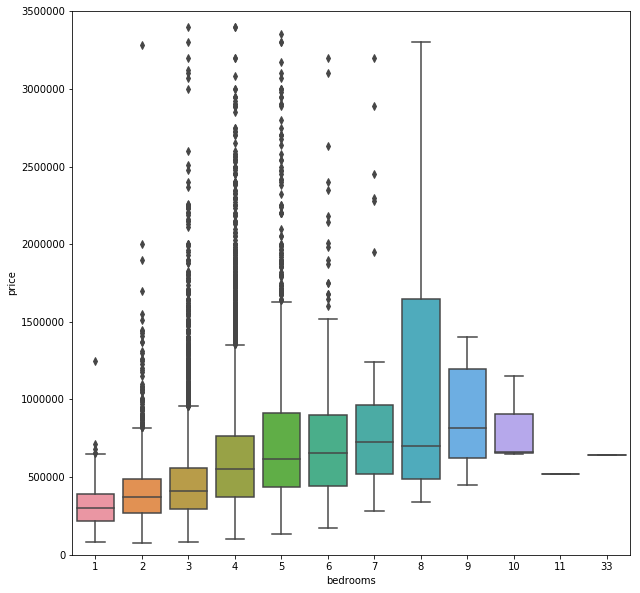

In [39]:
var = 'bedrooms'
data_graph = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data_graph)
fig.axis(ymin=0, ymax=3500000);

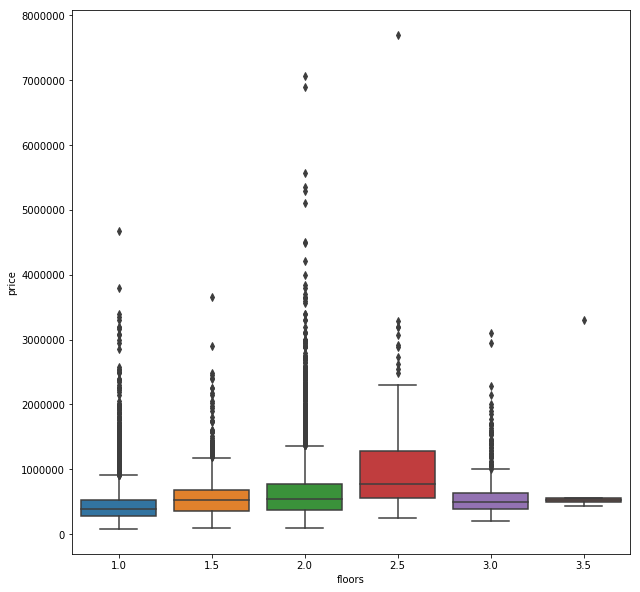

In [40]:
var = 'floors'
data_graph = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data_graph)

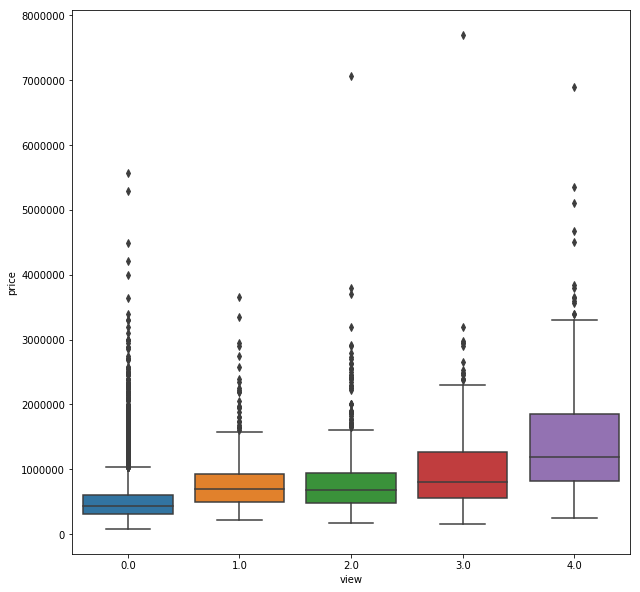

In [41]:
var = 'view'
data_graph = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data_graph)

In [42]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702328
grade            0.667738
sqft_above       0.605143
sqft_living15    0.586415
bathrooms        0.525889
view             0.394885
bedrooms         0.309204
lat              0.306507
waterfront       0.265969
floors           0.256355
yr_renovated     0.116719
sqft_lot         0.087937
sqft_lot15       0.083192
yr_built         0.054459
condition        0.035290
long             0.022101
year_sold        0.004601
month_sold      -0.010234
id              -0.015796
zipcode         -0.053166
Name: price, dtype: float64

## Examination of Multicollinearity

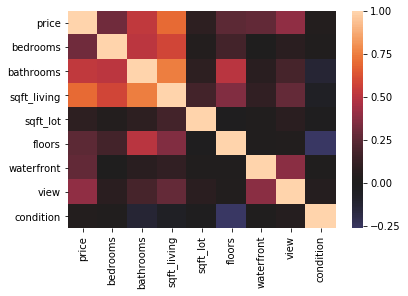

In [43]:
data_pred = data.iloc[:,2:11]
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

In [44]:
abs(data_pred.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
price,True,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False
floors,False,False,False,False,False,True,False,False,False
waterfront,False,False,False,False,False,False,True,False,False
view,False,False,False,False,False,False,False,True,False
condition,False,False,False,False,False,False,False,False,True


There is evidence of a linear relationship and it appears to be positive. Also, the presence of multicollinearity will inform my decision to combine some columns.

## Transformations and Scaling

Text(0.5, 1.0, 'after')

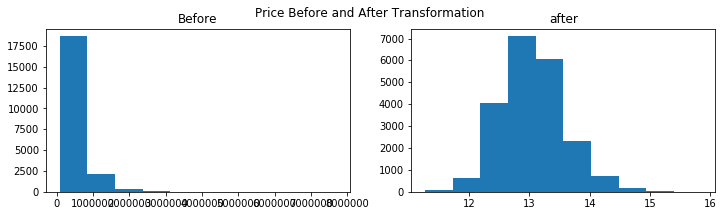

In [45]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.suptitle('Price Before and After Transformation')

ax1.hist(data['price'])
ax1.set_title('Before')


data['log_price'] = np.log(data['price'])
ax2.hist(data['log_price'])
ax2.set_title('after')

#logbeds = data['log_bedrooms']
#(acc - min(acc)) / (max(acc) - min(acc))
#scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
#data['scaled_beds'] = (logbeds - np.mean(logbeds) / np.sqrt(np.var(logbeds)))
#ax3.hist(data.scaled_beds)
#ax3.set_title('Scaled')

Text(0.5, 1.0, 'Scaled')

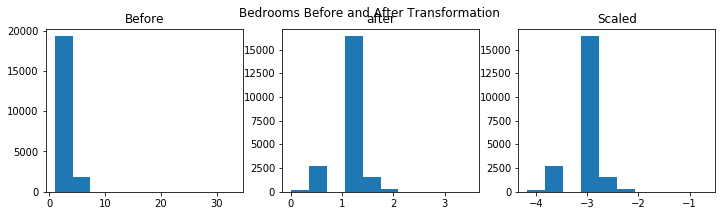

In [46]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Bedrooms Before and After Transformation')

ax1.hist(data['bedrooms'])
ax1.set_title('Before')


data['log_bedrooms'] = np.log(data['bedrooms'])
ax2.hist(data['log_bedrooms'])
ax2.set_title('after')

logbeds = data['log_bedrooms']
#(acc - min(acc)) / (max(acc) - min(acc))
#scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
data['scaled_beds'] = (logbeds - np.mean(logbeds) / np.sqrt(np.var(logbeds)))
ax3.hist(data.scaled_beds)
ax3.set_title('Scaled')

Text(0.5, 1.0, 'Scaled')

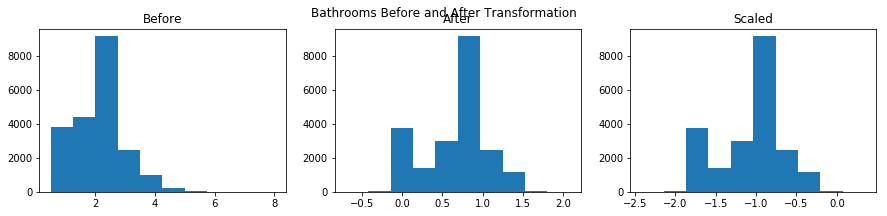

In [47]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
fig.suptitle('Bathrooms Before and After Transformation')

ax1.hist(data['bathrooms'])
ax1.set_title('Before')

data['log_bathrooms'] = np.log(data['bathrooms'])
ax2.hist(data['log_bathrooms'])
ax2.set_title('After')

logbathrooms = data['log_bathrooms']
data['scaled_bathrooms'] = (logbathrooms - np.mean(logbathrooms) / np.sqrt(np.var(logbathrooms)))
ax3.hist(data.scaled_bathrooms)
ax3.set_title('Scaled')

#(logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))

Text(0.5, 1.0, 'Scaled')

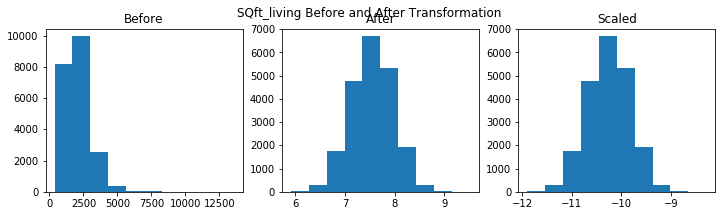

In [48]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('SQft_living Before and After Transformation')

ax1.hist(data['sqft_living'])
ax1.set_title('Before')

data['log_sqft_living'] = np.log(data['sqft_living'])
ax2.hist(data['log_sqft_living'])
ax2.set_title('After')

logsqftliving = data['log_sqft_living']
data['scaled_sqftliving'] = (logsqftliving - np.mean(logsqftliving) / np.sqrt(np.var(logsqftliving)))
ax3.hist(data.scaled_sqftliving)
ax3.set_title('Scaled')

Text(0.5, 1.0, 'Scaled')

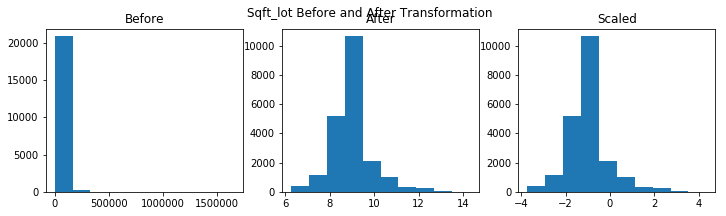

In [49]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Sqft_lot Before and After Transformation')

ax1.hist(data['sqft_lot'])
ax1.set_title('Before')

data['log_sqft_lot'] = np.log(data['sqft_lot'])
ax2.hist(data['log_sqft_lot'])
ax2.set_title('After')

logsqftlot = data['log_sqft_lot']
data['scaled_sqftlot'] = (logsqftlot - np.mean(logsqftlot) / np.sqrt(np.var(logsqftlot)))
ax3.hist(data.scaled_sqftlot)
ax3.set_title('Scaled')



Text(0.5, 1.0, 'Scaled')

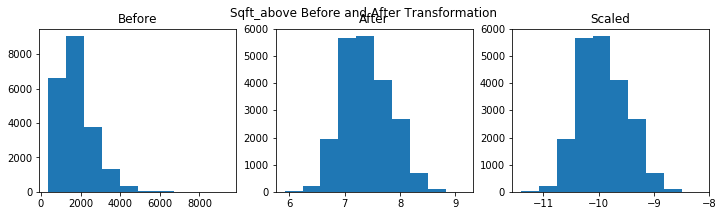

In [50]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Sqft_above Before and After Transformation')

ax1.hist(data['sqft_above'])
ax1.set_title('Before')

data['log_sqft_above'] = np.log(data['sqft_above'])
ax2.hist(data['log_sqft_above'])
ax2.set_title('After')


logsqftabove = data['log_sqft_above']
data['scaled_sqftabove'] = (logsqftabove - np.mean(logsqftabove) / np.sqrt(np.var(logsqftabove)))
ax3.hist(data.scaled_sqftabove)
ax3.set_title('Scaled')



Text(0.5, 1.0, 'Scaled')

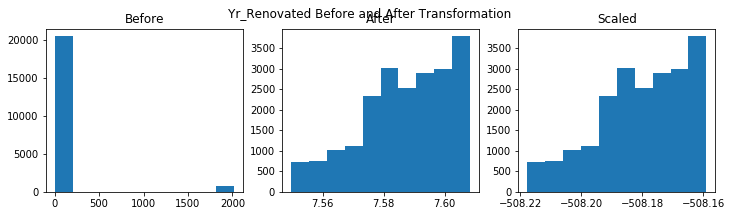

In [51]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Yr_Renovated Before and After Transformation')

ax1.hist(data['yr_renovated'])
ax1.set_title('Before')

data['yr_renovated_fill'] = data.yr_renovated.replace(0,data['yr_built'])
data['log_yr_renovated'] = np.log(data['yr_renovated_fill'])

ax2.hist(data['log_yr_renovated'])
ax2.set_title('After')


logyr_renovated = data['log_yr_renovated']
data['scaled_yr_renovated'] = (logyr_renovated - np.mean(logyr_renovated) / np.sqrt(np.var(logyr_renovated)))
ax3.hist(data.scaled_yr_renovated)
ax3.set_title('Scaled')

Text(0.5, 1.0, 'Scaled')

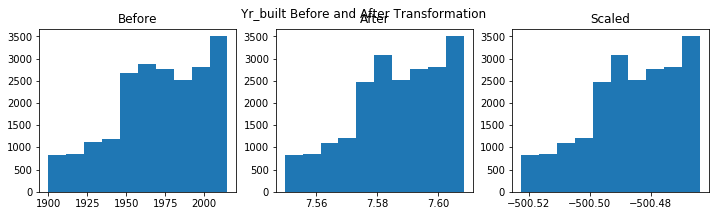

In [52]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Yr_built Before and After Transformation')

ax1.hist(data['yr_built'])
ax1.set_title('Before')

data['log_yr_built'] = np.log(data['yr_built'])
ax2.hist(data['log_yr_built'])
ax2.set_title('After')


logyr_built = data['log_yr_built']
data['scaled_yr_built'] = (logyr_built - np.mean(logyr_built) / np.sqrt(np.var(logyr_built)))
ax3.hist(data.scaled_yr_built)
ax3.set_title('Scaled')

# MODEL

First model without scaling/normalization

In [53]:
data_fin = pd.DataFrame([])
data_fin['sqft_lot'] = data['sqft_lot']
data_fin['sqft_living'] = data['sqft_living']
data_fin['sqft_above'] = data['sqft_above']
data_fin['zip_code'] = data['zipcode']
data_fin['bedrooms'] = data['bedrooms']
data_fin['view'] = data['view']
data_fin['grade'] = data['grade']
data_fin['bathrooms'] = data['bathrooms']
data_fin['yr_built'] = data['yr_built']
data_fin['renovated'] = data['yr_renovated']
data_fin['lat'] = data['lat']
data_fin['long'] = data['long']
data_fin['waterfront'] = data['waterfront']
data_fin['floors'] = data['floors']
data_fin['sqft_living15'] = data['sqft_living15']
data_fin['sqft_lot15'] = data['sqft_lot15']
price = data['price']
data_ols = pd.concat([price, data_fin,], axis=1)

In [54]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = data_ols.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum


In [55]:
first = ols(formula= formula, data = data_ols, missing = 'drop').fit()
first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     3059.
Date:                Thu, 26 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:46:41   Log-Likelihood:            -2.8829e+05
No. Observations:               21143   AIC:                         5.766e+05
Df Residuals:                   21126   BIC:                         5.768e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.203e+07   2.94e+06      4.092      0.000    6.27e+06    1.78e+07
sqft_lot          0.1052      0.049      2.145      0.032       0.009       0.201
sqft_living     153.7096      4.455     34.506      0.000     144.978     162.441
sqft_above       26.4760      4.411      6.003      0.000      17.831      35.121
zip_code       -629.3236     33.283    -18.908      0.000    -694.561    -564.086
bedrooms      -3.517e+04   1930.055    -18.224      0.000    -3.9e+04   -3.14e+04
view           5.427e+04   2154.516     25.190      0.000       5e+04    5.85e+04
grade          9.718e+04   2191.132     44.350      0.000    9.29e+04    1.01e+05
bathrooms      4.365e+04   3307.835     13.196      0.000    3.72e+04    5.01e+04
yr_built      -2902.2239     69.397    -41.820      0.000   -3038.248   -2766.200
renovated        16.6036      4.000      4.151      0.000       8.764      24.443
lat            5.939e+05   1.09e+04     54.571      0.000    5.73e+05    6.15e+05
long          -2.173e+05   1.34e+04    -16.264      0.000   -2.44e+05   -1.91e+05
waterfront      6.27e+05   1.85e+04     33.979      0.000    5.91e+05    6.63e+05
floors         4721.5154   3653.891      1.292      0.196   -2440.390    1.19e+04
sqft_living15    20.5874      3.494      5.892      0.000      13.738      27.437
sqft_lot15       -0.3656      0.075     -4.874      0.000      -0.513      -0.219
==============================================================================
Omnibus:                    17747.470   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1729925.954
Skew:                           3.501   Prob(JB):                         0.00
Kurtosis:                      46.757   Cond. No.                     2.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

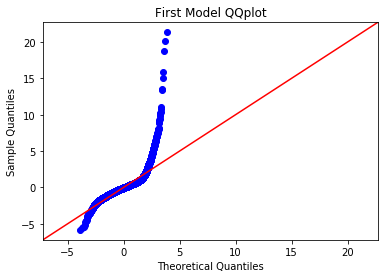

In [73]:
res = first.resid
fig = sm.qqplot(res,line='45',fit=True)
plt.title('First Model QQplot')
plt.show()

## Revised Model

In [57]:
data_fin = pd.DataFrame([])
#data_fin['sqft_lot'] = data['scaled_sqftlot']
data_fin['sqft_living'] = data['scaled_sqftliving']
#data_fin['sqft_above'] = data['scaled_sqftabove']
data_fin['rooms'] = data['bedrooms'] + data['bathrooms']
data_fin['view'] = data['view']
data_fin['condition'] = data['condition']
data_fin['grade'] = data['grade']
data_fin['age_house'] = data['year_sold'] - data['yr_built']
data_fin['renovated'] = data['scaled_yr_renovated']
data_fin['lat'] = data['lat']
data_fin['long'] = data['long']
data_fin['waterfront'] = data['waterfront']
data_fin['floors'] = data['floors']
data_fin['sqft_living15'] = data['sqft_living15']
data_fin['sqft_lot15'] = data['sqft_lot15']
price = data['log_price']
data_ols = pd.concat([price, data_fin, zip_dummies], axis=1)

In [58]:
outcome = 'price'
predictors = data_ols.drop('log_price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum


In [59]:
second = ols(formula= formula, data = data_ols, missing = 'drop').fit()
second.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1837.
Date:                Thu, 26 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:46:46   Log-Likelihood:                 5737.9
No. Observations:               21143   AIC:                        -1.131e+04
Df Residuals:                   21060   BIC:                        -1.065e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1136.5959    121.933      9.321      0.000     897.598    1375.594
sqft_living       0.4145      0.007     62.469      0.000       0.401       0.427
rooms             0.0009      0.001      0.641      0.522      -0.002       0.004
view              0.0605      0.002     30.396      0.000       0.057       0.064
condition         0.0485      0.002     21.760      0.000       0.044       0.053
grade             0.1059      0.002     52.273      0.000       0.102       0.110
age_house         0.0018      0.000     14.709      0.000       0.002       0.002
renovated         2.3141      0.240      9.658      0.000       1.844       2.784
lat               0.4839      0.074      6.572      0.000       0.340       0.628
long             -0.2621      0.053     -4.924      0.000      -0.366      -0.158
waterfront        0.4880      0.017     28.521      0.000       0.454       0.522
floors            0.0013      0.003      0.394      0.694      -0.005       0.008
sqft_living15  8.962e-05    3.3e-06     27.194      0.000    8.32e-05    9.61e-05
sqft_lot15     8.285e-07   5.35e-08     15.475      0.000    7.24e-07    9.33e-07
zip_98002        -0.0004      0.017     -0.026      0.979      -0.033       0.032
zip_98003        -0.0087      0.015     -0.579      0.563      -0.038       0.021
zip_98004         0.9682      0.027     35.485      0.000       0.915       1.022
zip_98005         0.5872      0.029     20.149      0.000       0.530       0.644
zip_98006         0.5163      0.024     21.628      0.000       0.469       0.563
zip_98007         0.5107      0.030     16.966      0.000       0.452       0.570
zip_98008         0.5177      0.029     18.085      0.000       0.462       0.574
zip_98010         0.3169      0.026     12.349      0.000       0.267       0.367
zip_98011         0.2309      0.037      6.208      0.000       0.158       0.304
zip_98014         0.2612      0.041      6.397      0.000       0.181       0.341
zip_98019         0.1989      0.040      4.929      0.000       0.120       0.278
zip_98022         0.1749      0.022      7.830      0.000       0.131       0.219
zip_98023        -0.0709      0.014     -5.117      0.000      -0.098      -0.044
zip_98024         0.4170      0.036     11.581      0.000       0.346       0.488
zip_98027         0.4483      0.025     18.270      0.000       0.400       0.496
zip_98028         0.1899      0.036      5.256      0.000       0.119       0.261
zip_98029         0.5331      0.028     19.006      0.000       0.478       0.588
zip_98030         0.0372      0.017      2.245      0.025       0.005       0.070
zip_98031         0.0418      0.017      2.421      0.015       0.008       0.076
zip_98032        -0.0740      0.020     -3.710      0.000      -0.113      -0.035
zip_98033         0.6136      0.031     19.791   

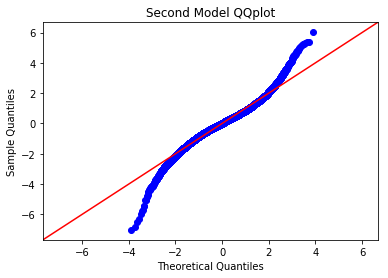

In [71]:
res = second.resid
fig=sm.qqplot(res, line='45',fit=True)
plt.title('Second Model QQplot')
plt.show()

While the R-squared score went up markedly, some of the variables have p-values that are not statistically significant. The combination of columns to form the room column will be eliminated in the next model and replaced with the bedrooms column. The decision to not include bathrooms is because it is highly correlated with the sqft_living item.

## Final Model

In [61]:
data_fin = pd.DataFrame([])
#data_fin['sqft_lot'] = data['scaled_sqftlot']
data_fin['sqft_living'] = data['scaled_sqftliving']
#data_fin['sqft_above'] = data['scaled_sqftabove']
data_fin['bathrooms'] = data['bathrooms']
data_fin['view'] = data['view']
data_fin['condition'] = data['condition']
data_fin['age_house'] = data['year_sold'] - data['yr_built']
data_fin['renovated'] = data['scaled_yr_renovated']
data_fin['lat'] = data['lat']
data_fin['long'] = data['long']
data_fin['waterfront'] = data['waterfront']
data_fin['sqft_living15'] = data['sqft_living15']
data_fin['sqft_lot15'] = data['sqft_lot15']
price = data['log_price']
data_ols3 = pd.concat([price, data_fin, zip_dummies, grade_dummies], axis=1)

In [62]:
outcome = 'price'
predictors = data_ols.drop('log_price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum


In [63]:
third = ols(formula= formula, data = data_ols, missing = 'drop').fit()
third.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1837.
Date:                Thu, 26 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:46:48   Log-Likelihood:                 5737.9
No. Observations:               21143   AIC:                        -1.131e+04
Df Residuals:                   21060   BIC:                        -1.065e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1136.5959    121.933      9.321      0.000     897.598    1375.594
sqft_living       0.4145      0.007     62.469      0.000       0.401       0.427
rooms             0.0009      0.001      0.641      0.522      -0.002       0.004
view              0.0605      0.002     30.396      0.000       0.057       0.064
condition         0.0485      0.002     21.760      0.000       0.044       0.053
grade             0.1059      0.002     52.273      0.000       0.102       0.110
age_house         0.0018      0.000     14.709      0.000       0.002       0.002
renovated         2.3141      0.240      9.658      0.000       1.844       2.784
lat               0.4839      0.074      6.572      0.000       0.340       0.628
long             -0.2621      0.053     -4.924      0.000      -0.366      -0.158
waterfront        0.4880      0.017     28.521      0.000       0.454       0.522
floors            0.0013      0.003      0.394      0.694      -0.005       0.008
sqft_living15  8.962e-05    3.3e-06     27.194      0.000    8.32e-05    9.61e-05
sqft_lot15     8.285e-07   5.35e-08     15.475      0.000    7.24e-07    9.33e-07
zip_98002        -0.0004      0.017     -0.026      0.979      -0.033       0.032
zip_98003        -0.0087      0.015     -0.579      0.563      -0.038       0.021
zip_98004         0.9682      0.027     35.485      0.000       0.915       1.022
zip_98005         0.5872      0.029     20.149      0.000       0.530       0.644
zip_98006         0.5163      0.024     21.628      0.000       0.469       0.563
zip_98007         0.5107      0.030     16.966      0.000       0.452       0.570
zip_98008         0.5177      0.029     18.085      0.000       0.462       0.574
zip_98010         0.3169      0.026     12.349      0.000       0.267       0.367
zip_98011         0.2309      0.037      6.208      0.000       0.158       0.304
zip_98014         0.2612      0.041      6.397      0.000       0.181       0.341
zip_98019         0.1989      0.040      4.929      0.000       0.120       0.278
zip_98022         0.1749      0.022      7.830      0.000       0.131       0.219
zip_98023        -0.0709      0.014     -5.117      0.000      -0.098      -0.044
zip_98024         0.4170      0.036     11.581      0.000       0.346       0.488
zip_98027         0.4483      0.025     18.270      0.000       0.400       0.496
zip_98028         0.1899      0.036      5.256      0.000       0.119       0.261
zip_98029         0.5331      0.028     19.006      0.000       0.478       0.588
zip_98030         0.0372      0.017      2.245      0.025       0.005       0.070
zip_98031         0.0418      0.017      2.421      0.015       0.008       0.076
zip_98032        -0.0740      0.020     -3.710      0.000      -0.113      -0.035
zip_98033         0.6136      0.031     19.791   

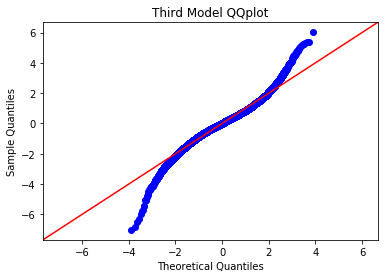

In [74]:
res = third.resid
fig = sm.qqplot(res, line = '45', fit = True)
plt.title('Third Model QQplot')
plt.show()

# INTERPRET

Text(0.5, 1.0, 'Residuals of Third Model')

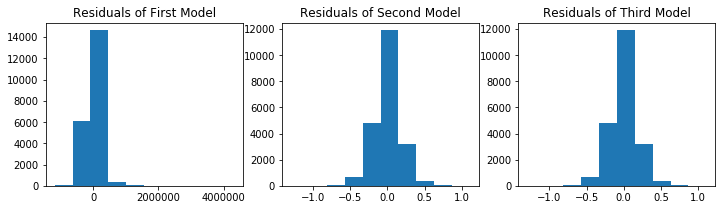

In [65]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))


ax1.hist(first.resid)
ax1.set_title('Residuals of First Model')

ax2.hist(second.resid)
ax2.set_title('Residuals of Second Model')

ax3.hist(third.resid)
ax3.set_title('Residuals of Third Model')



In [66]:
print(first.pvalues)
print(first.rsquared)

Intercept         4.298857e-05
sqft_lot          3.196377e-02
sqft_living      6.981468e-254
sqft_above        1.969515e-09
zip_code          4.391006e-79
bedrooms          1.215655e-73
view             5.638957e-138
grade             0.000000e+00
bathrooms         1.334110e-39
yr_built          0.000000e+00
renovated         3.319916e-05
lat               0.000000e+00
long              4.049866e-59
waterfront       1.936305e-246
floors            1.963061e-01
sqft_living15     3.883384e-09
sqft_lot15        1.100149e-06
dtype: float64
0.6985151058067691


In [67]:
print(second.pvalues)
print(second.rsquared)

Intercept         1.257253e-20
sqft_living       0.000000e+00
rooms             5.215179e-01
view             1.200953e-198
condition        7.782094e-104
grade             0.000000e+00
age_house         9.850820e-49
renovated         5.070980e-22
lat               5.078291e-11
long              8.556328e-07
waterfront       1.371959e-175
floors            6.937818e-01
sqft_living15    4.422852e-160
sqft_lot15        1.004886e-53
zip_98002         9.792949e-01
zip_98003         5.627181e-01
zip_98004        6.332749e-268
zip_98005         1.902073e-89
zip_98006        1.292884e-102
zip_98007         3.936314e-64
zip_98008         1.479013e-72
zip_98010         6.496042e-35
zip_98011         5.449760e-10
zip_98014         1.613155e-10
zip_98019         8.341773e-07
zip_98022         5.114321e-15
zip_98023         3.129528e-07
zip_98024         6.372724e-31
zip_98027         5.354891e-74
zip_98028         1.484981e-07
                     ...      
zip_98092         3.279214e-03
zip_9810

In [70]:
print(third.pvalues)
print(third.rsquared)

Intercept         1.257253e-20
sqft_living       0.000000e+00
rooms             5.215179e-01
view             1.200953e-198
condition        7.782094e-104
grade             0.000000e+00
age_house         9.850820e-49
renovated         5.070980e-22
lat               5.078291e-11
long              8.556328e-07
waterfront       1.371959e-175
floors            6.937818e-01
sqft_living15    4.422852e-160
sqft_lot15        1.004886e-53
zip_98002         9.792949e-01
zip_98003         5.627181e-01
zip_98004        6.332749e-268
zip_98005         1.902073e-89
zip_98006        1.292884e-102
zip_98007         3.936314e-64
zip_98008         1.479013e-72
zip_98010         6.496042e-35
zip_98011         5.449760e-10
zip_98014         1.613155e-10
zip_98019         8.341773e-07
zip_98022         5.114321e-15
zip_98023         3.129528e-07
zip_98024         6.372724e-31
zip_98027         5.354891e-74
zip_98028         1.484981e-07
                     ...      
zip_98092         3.279214e-03
zip_9810

# CONCLUSIONS

This final model has a r-squared score of 87.7% and all non-categorical variables have p-values below 5% making the regression's results statistically significant

As discovered in the preparation of the data, there was a general positive relationship between many of the predictor values and the dependent variable, price. Moreover, there is a statistically significant relationship present as the probability of the model's f-statistic is zero and allows us to reject the null hypothesis. 

This final model has a r-squared score of 87.7% and all non-categorical variables have p-values below 5% making the regression's results statistically significant

#  RECOMMENDATIONS

With a high-degree of certainty, the model developed with the statsmodel library allows us predict the value of homes in the Seattle area. The preprocessing of data did it's best to promote normalilty in the dataset, but the QQplots show some traces of skew in the residuals. 

The major recommendation from this model is that the following variables have the most impact on a houses sale price. A homeowner or housing organization will want to invest in the quality of building materials (grade),add livable space to a unit (sqft_living) and find houses or plots of land that are near the water (waterfront). 

The amount of square feet in a home and its location respective to the waterfront are difficult to control for and might be harder to change. Thus, something that all homeowners or potential investors can take away from this model is that purchasing building materials of the highest quality will result in the largest home value growth. This conclusion is reached by examining the coefficients in the final model.